# Triangulations

A **triangulation** of a set of points or a polygon is a subdivision of its interior into a set of non-overlapping triangles. This is a fundamental task in computational geometry with numerous applications, including computer graphics, scientific visualization, geographic information systems (GIS), and the numerical solution of partial differential equations (PDEs) via the Finite Element Method.

First, let's define a helper function to plot a triangulation. The function will take a `2 x n` array of points `p` and a `3 x m` array `t`, where each column of `t` contains the indices of the three points that form a triangle.

In [1]:
using Plots
using TriplotRecipes # Provides the `trimesh` recipe for plotting triangulations.
default(legend=false, aspect_ratio=:equal) # Set convenient plot defaults.

"""
    tplot(p, t)

Plots a triangulation given points and triangle connectivity.

# Arguments
- `p`: A 2xN matrix of point coordinates.
- `t`: A 3xM matrix where each column defines a triangle with indices into `p`.
"""
function tplot(p, t)
    # Use the trimesh recipe to draw the triangles.
    trimesh(p[1,:], p[2,:], t, linecolor=:black,
            aspect_ratio=:equal, color=RGB(0.8,1,0.8))
    
    # Overlay the points (nodes) on the plot.
    scatter!(p[1,:], p[2,:], color=:blue)
end

tplot

Let's test this function with a small, manually-defined set of points and triangles.

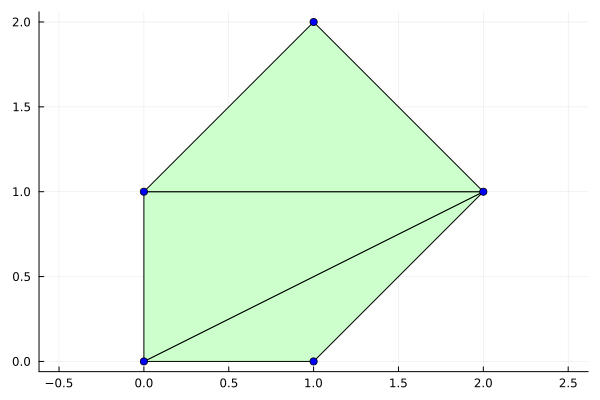

In [2]:
# p is a 2x5 matrix where each column is a point (x,y).
p = Float64[[0,0] [1,0] [0,1] [1,2] [2,1]]

# t is a 3x3 matrix where each column [i,j,k] defines a triangle using the
# i-th, j-th, and k-th points from p.
t = [[1,2,5] [1,5,3] [3,5,4]]

tplot(p, t)

## Delaunay Triangulation

For any given set of points, there can be many valid ways to triangulate them. However, one of the most important and widely used is the **Delaunay triangulation**. It's special because it satisfies several elegant and useful geometric properties.

### The Empty Circumcircle Property

The **circumcircle** of a triangle is the unique circle that passes through its three vertices. The defining characteristic of a Delaunay triangulation is the **in-circle** (or empty circumcircle) property. For any triangle in the triangulation, its circumcircle will not contain any other point from the input set in its interior. 

This means all circumcircles are "empty" of other points, as beautifully illustrated below.

![A Delaunay triangulation with the circumcircle of each triangle shown](Delaunay_circumcircles_centers.png)

(Image from <https://en.wikipedia.org/wiki/Delaunay_triangulation>)

### Key Properties

The empty circumcircle property leads to other desirable features:

1.  **Maximizes the Minimum Angle**: Of all possible triangulations of a set of points, the Delaunay triangulation maximizes the smallest angle. In other words, it tends to **avoid "skinny" triangles**. This is critically important in fields like engineering and physics, where very thin triangles can lead to numerical instability in simulations.

2.  **Dual of the Voronoi Diagram**: The Delaunay triangulation is the geometric dual of the Voronoi diagram of the same point set. The vertices of the Voronoi cells correspond to the circumcenters of the Delaunay triangles.

3.  **Contains the Convex Hull**: The boundary of the Delaunay triangulation is the convex hull of the point set.

We can use the `Delaunator.jl` package to compute this for us.

In [3]:
using Delaunator

# This is a helper function to wrap the Delaunator package's functionality.
function delaunay(p)
    # triangulate() returns a flat vector of indices [t1_p1, t1_p2, t1_p3, t2_p1, ...]
    triangles_flat = triangulate(PointsFromMatrix(p)).triangles

    # We use a highly efficient, zero-copy `reinterpret` to reshape this flat vector
    # into a 3xM matrix, which is the format our plotting function expects.
    return collect(reinterpret(reshape, Int32, triangles_flat))
end

delaunay (generic function with 1 method)

Let's apply this to our previous set of points and see how the Delaunay triangulation differs from our manual one.

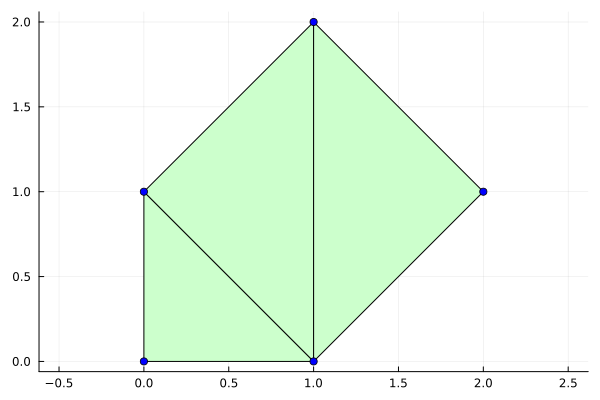

In [4]:
# Compute the Delaunay triangulation for our point set p.
t_delaunay = delaunay(p)

# Plot the result.
tplot(p, t_delaunay)

Notice that the triangulation is different! Compare this plot to the first one. The Delaunay algorithm chose a different set of internal edges to satisfy the empty circumcircle property and avoid skinny triangles.

Now, let's see the algorithm in action on a larger, random cloud of points.

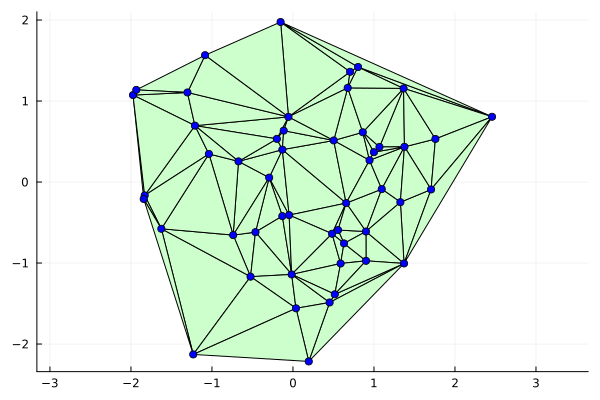

In [5]:
# 1. Generate 50 random points in a 2D plane.
p = randn(2, 50)

# 2. Compute their Delaunay triangulation.
t = delaunay(p)

# 3. Plot the resulting mesh.
tplot(p, t)